<center> <h1>Module 5 - Multiple Linear Regression Variable Selection Methods </h1> </center>
<center> <h2>Class Coding Analysis</h2> </center>

In [5]:
# load packages here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LinearRegression

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

# set seed
import random
random.seed(12345)

# supress warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

**This is the same data set used in the Module 5 Course Notes. You can check your code output against the output from the course notes to verify you are getting the correct results.**

Environmental impact studies seek to identify and quantify the affect of environmental conditions on human and ecological health. For example, extreme heat poses a threat to public health by creating conditions conducive to hyperthermia. Likewise, extreme cold poses a threat to public health via conditions suitable to hypothermia. Extreme weather events (tornados, typhoons, etc.) also pose an obvious threat to public health. A less understood environmental variable that, hypothetically, may also pose a threat to public health is the concentration of pollution (air quality).

In an effort to understand the impact of the environment on human health, the data set "EnvironmentalImpacts.txt" (found on Canvas) contains environmental and socio-economic information for 60 different cities in the U.S. The collected variables are given in the table below.

Variable       | Description
-------------- | -------------
AnnPrecip      | Average annual precipitation
MeanJanTemp    | Average January temperature (in degrees Fahrenheit)
MeanJulyTemp   | Average July temperature (in degrees Fahrenheit)
PctGT65        | Percent of population greater than 65 years old
PopPerHouse    | Population per household
School         | Median school years completed
PctSound       | Percent of housing units that are "sound"
PopPerSqMile   | Population per square mile
PctNonWhite    | Percent of population that is nonwhite
PctWhiteCollar | Percent of employment in white-collar jobs
PctU20000      | Percent of families with income under $20,000
Hydrocarbons   | Relative pollution potential of hydrocarbons
Nitrogen       | Relative pollution potential of oxides in nitrogen
SO2            | Relative pollution potential of oxides in sulfur dioxide
RelHumid       | Annual average relative humidity
AAMort         | Age-adjusted mortality

The goal of this analysis is to determine which, if any, of the above environmental and socioeconomic variables contributed to the mortality rate, with an emphasis of understanding the role of pollution.

Do the following:

1. Download the "EnvironmentalImpacts.txt" file from Canvas and put it in the same folder as this file.
2. Read in the data set, call it "env", and look at a summary of the data. **Remove the "row" column (which contains row numbers) from the data set.**
3. Make sure the class of "env" is a *Pandas dataframe*.

In [6]:
env = pd.read_table("EnvironmentalImpacts.txt", delimiter = ' ')
env.drop('row', axis = 1, inplace = True)
env.describe()

,AnnPrecip,MeanJanTemp,MeanJulyTemp,PctGT65,PopPerHouse,School,PctSound,PopPerSqMile,PctNonWhite,PctWhiteCollar,PctU20000,log.Hydro,log.Nit,log.SO2,RelHumid,AAMort
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,37.366667,33.983333,74.583333,8.798333,3.263167,11.973333,80.913333,3876.050000,11.870000,46.081667,14.373333,2.753290,2.323627,3.197213,57.666667,940.358500
std,9.984678,10.168899,4.763177,1.464552,0.135252,0.845299,5.141373,1454.102361,8.921148,4.613043,4.160096,1.175853,1.184413,1.497608,5.369931,62.206685
min,10.000000,12.000000,63.000000,5.600000,2.920000,10.000000,66.800000,1441.000000,0.800000,33.800000,9.400000,0.000000,0.000000,0.000000,38.000000,790.730000
25%,32.750000,27.000000,72.000000,7.675000,3.210000,11.400000,78.375000,3104.250000,4.950000,43.250000,12.000000,1.945910,1.386294,2.397895,55.000000,898.370000
50%,38.000000,31.500000,74.000000,9.000000,3.265000,12.050000,81.150000,3567.000000,10.400000,45.500000,13.200000,2.673554,2.197225,3.398970,57.000000,943.685000
75%,43.250000,40.000000,77.250000,9.700000,3.360000,12.500000,83.600000,4519.750000,15.650000,49.525000,15.150000,3.409395,3.166145,4.233797,60.000000,983.205000
max,60.000000,67.000000,85.000000,11.800000,3.530000,13.300000,90.700000,9699.000000,38.500000,59.700000,26.400000,6.473891,5.765191,5.627621,73.000000,1113.160000


## Variable Selection Methods

In a real analysis, you would do many things before getting to this point, but we will skip all that here just to demonstrate the new coding elements of this module. We will first separate the response from the predictors.

In [7]:
y = env[['AAMort']]
X = env.drop('AAMort', axis = 1)

###  Start by applying the best subsets variable selection procedure from `mlxtend` to this data set. Use the (negative) PMSE as the selection criteria metric with cv = 5. Explore different models and write down the variable names you would include in a model based on this method. Explain your reasoning.

(Takes very long to run due to the number of variables)

In [8]:
best_subsets_selection = EFS(estimator=LinearRegression(), 
                             min_features = 1,
                             max_features = len(X.columns),
                             scoring = 'neg_mean_squared_error',
                             print_progress = False,
                             cv = 5)

best_subsets = best_subsets_selection.fit(X, y)

print('Best subset:', best_subsets.best_feature_names_)

Best subset: ('AnnPrecip', 'MeanJanTemp', 'MeanJulyTemp', 'PopPerHouse', 'School', 'PctNonWhite', 'log.Hydro', 'log.Nit')


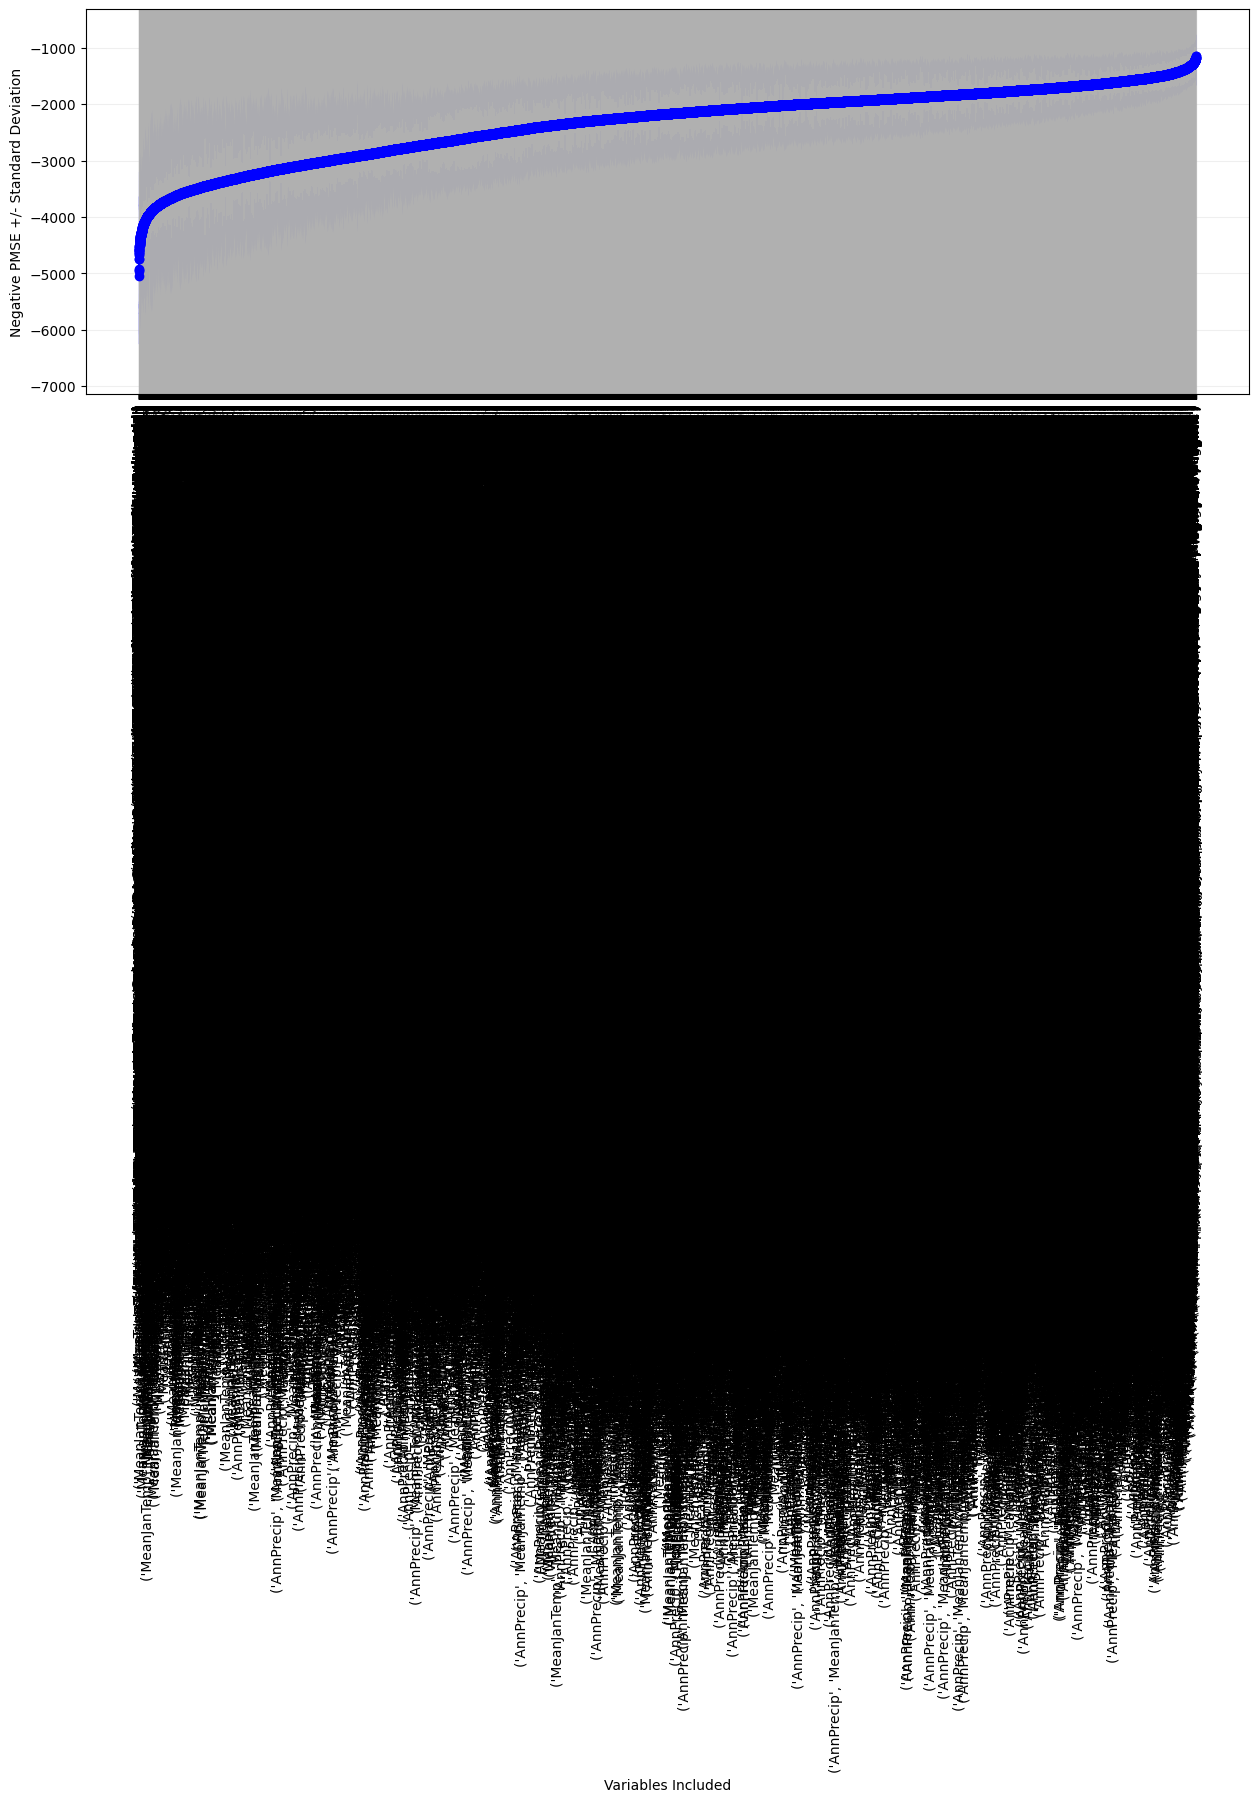

In [9]:
metric_dict = best_subsets_selection.get_metric_dict()
x_axis = sorted(metric_dict.keys())

metric_dict_sorted = dict(sorted(metric_dict.items(), key = lambda x: x[1]['avg_score']))

fig = plt.figure(figsize = (15, 5))
k_feat = metric_dict_sorted.keys()
k_feat_list = list(k_feat)
avg = [metric_dict_sorted[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict_sorted[k]['avg_score'] +
                 metric_dict_sorted[k]['std_dev'])
    lower.append(metric_dict_sorted[k]['avg_score'] -
                 metric_dict_sorted[k]['std_dev'])
    
plt.fill_between(x_axis,
                 upper,
                 lower,
                 alpha = 0.2,
                 color = 'blue',
                 lw = 1)

plt.plot(x_axis, avg, color = 'blue', marker = 'o')
plt.ylabel('Negative PMSE +/- Standard Deviation')
plt.xlabel('Variables Included')
plt.xticks(x_axis, 
           [str(metric_dict_sorted[k]['feature_names']) for k in k_feat_list], 
           rotation = 90)
plt.grid(alpha = 0.2)
plt.show()

In [10]:
# Code to see the next best models
best_subsets_results = pd.DataFrame.from_dict(best_subsets_selection.get_metric_dict()).T
best_subsets_results_sorted = best_subsets_results.sort_values(by = 'avg_score', ascending = False)
best_subsets_results_sorted.head(5) # adjust to see more or less models based on what looks promising in the plot

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
16771,"(0, 1, 2, 4, 5, 8, 11, 12)","[-1403.8174669864284, -632.6340545413663, -157...",-1141.855767,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PopPerH...",424.029917,329.909682,164.954841
10831,"(0, 1, 4, 5, 8, 11, 12)","[-1352.8946312793512, -640.7656916504388, -163...",-1150.399212,"(AnnPrecip, MeanJanTemp, PopPerHouse, School, ...",426.999603,332.220198,166.110099
5506,"(0, 1, 5, 8, 11, 12)","[-1454.8555636311783, -586.6522890443933, -172...",-1177.774219,"(AnnPrecip, MeanJanTemp, School, PctNonWhite, ...",501.945567,390.530704,195.265352
22876,"(0, 1, 2, 3, 4, 5, 8, 11, 12)","[-1216.2860114626153, -523.9285575629168, -138...",-1179.289453,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PctGT65...",525.344253,408.735677,204.367838
23381,"(0, 1, 2, 4, 5, 8, 10, 11, 12)","[-1388.7023949186303, -680.9785632084454, -173...",-1181.170763,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PopPerH...",462.073746,359.509073,179.754536


### Now apply the forward selection procedure (just for illustration - NEVER do this in real life) using `mlxtend` to this data set. Use the (negative) PMSE as the selection criteria metric with cv = 5. Explore different models and write down the variable names you would include in a model based on this method. Explain your reasoning.

In [7]:
forward_selection = SFS(LinearRegression(fit_intercept = True), 
                        k_features = (1, len(X.columns)), 
                        forward = True, 
                        floating = False,
                        scoring = 'neg_mean_squared_error',
                        cv = 5)

forward = forward_selection.fit(X, y)

print('Forward Stepwise Selection:', forward.k_feature_names_)

Forward Stepwise Selection: ('AnnPrecip', 'MeanJanTemp', 'MeanJulyTemp', 'PopPerHouse', 'School', 'PctNonWhite', 'log.Hydro', 'log.Nit')


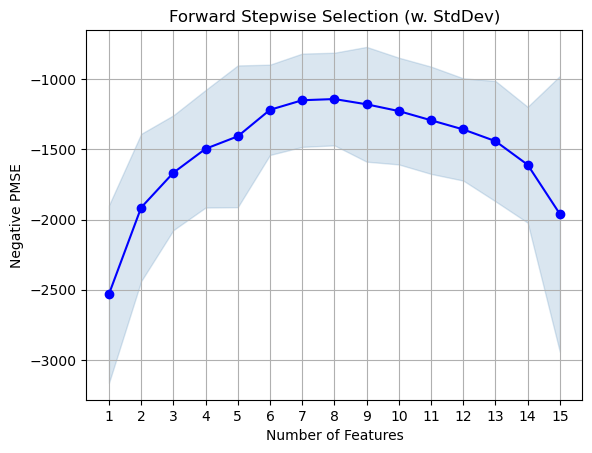

In [8]:
# Code to plot the (negative) PMSEs
fig1 = plot_sfs(forward.get_metric_dict(), kind = 'std_dev')
plt.title('Forward Stepwise Selection (w. StdDev)')
plt.ylabel("Negative PMSE")
plt.grid()
plt.show()

In [ ]:
# Code to see the next best models
forward_results = pd.DataFrame.from_dict(forward_selection.get_metric_dict()).T
forward_results_sorted = forward_results.sort_values(by = 'avg_score', ascending = False)
forward_results_sorted.head(5) # adjust to see more or less models based on what looks promising in the plot

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
16771,"(0, 1, 2, 4, 5, 8, 11, 12)","[-1403.8174669864284, -632.6340545413663, -157...",-1141.855767,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PopPerH...",424.029917,329.909682,164.954841
10831,"(0, 1, 4, 5, 8, 11, 12)","[-1352.8946312793512, -640.7656916504388, -163...",-1150.399212,"(AnnPrecip, MeanJanTemp, PopPerHouse, School, ...",426.999603,332.220198,166.110099
5506,"(0, 1, 5, 8, 11, 12)","[-1454.8555636311783, -586.6522890443933, -172...",-1177.774219,"(AnnPrecip, MeanJanTemp, School, PctNonWhite, ...",501.945567,390.530704,195.265352
22876,"(0, 1, 2, 3, 4, 5, 8, 11, 12)","[-1216.2860114626153, -523.9285575629168, -138...",-1179.289453,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PctGT65...",525.344253,408.735677,204.367838
23381,"(0, 1, 2, 4, 5, 8, 10, 11, 12)","[-1388.7023949186303, -680.9785632084454, -173...",-1181.170763,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PopPerH...",462.073746,359.509073,179.754536


In [10]:
# Code to pull out variable names of 5-variable model
forward_results.sort_index().iloc[4, 3]

('MeanJanTemp', 'PopPerHouse', 'School', 'PctNonWhite', 'log.Nit')

### Now apply the backward selection procedure using `mlxtend` to this data set. Use the (negative) PMSE as the selection criteria metric with cv = 5. Explore different models and write down the variable names you would include in a model based on this method. Explain your reasoning.

In [11]:
backward_selection = SFS(LinearRegression(fit_intercept = True), 
                         k_features = (1, len(X.columns)), 
                         forward = False, 
                         floating = False,
                         scoring = 'neg_mean_squared_error',
                         cv = 5)

backward = backward_selection.fit(X, y)

print('Backward Stepwise Selection:', backward.k_feature_names_)

Backward Stepwise Selection: ('AnnPrecip', 'MeanJanTemp', 'MeanJulyTemp', 'PopPerHouse', 'School', 'PctNonWhite', 'log.Hydro', 'log.Nit')


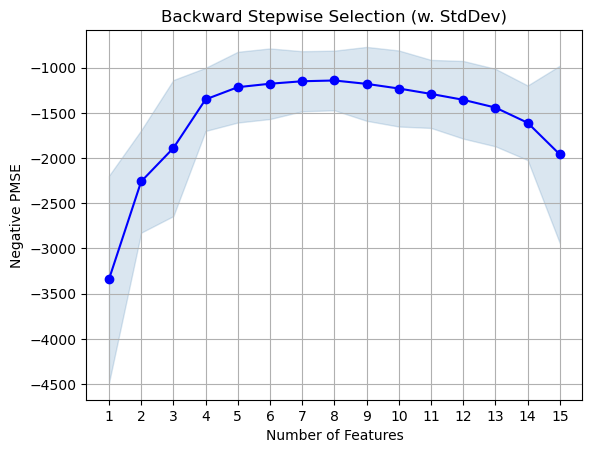

In [12]:
# Code to plot the (negative) PMSEs
fig1 = plot_sfs(backward.get_metric_dict(), kind = 'std_dev')
plt.title('Backward Stepwise Selection (w. StdDev)')
plt.ylabel("Negative PMSE")
plt.grid()
plt.show()

In [13]:
# Code to see the next best models
backward_results = pd.DataFrame.from_dict(backward.get_metric_dict()).T
backward_results_sorted = backward_results.sort_values(by = 'avg_score', ascending = False)
backward_results_sorted.head(10)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
8,"(0, 1, 2, 4, 5, 8, 11, 12)","[-1403.8174669864263, -632.6340545413613, -157...",-1141.855767,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PopPerH...",424.029918,329.909682,164.954841
7,"(0, 1, 4, 5, 8, 11, 12)","[-1352.8946312793485, -640.7656916504335, -163...",-1150.399212,"(AnnPrecip, MeanJanTemp, PopPerHouse, School, ...",426.999603,332.220198,166.110099
6,"(0, 1, 5, 8, 11, 12)","[-1454.8555636311812, -586.6522890443907, -172...",-1177.774219,"(AnnPrecip, MeanJanTemp, School, PctNonWhite, ...",501.945567,390.530704,195.265352
9,"(0, 1, 2, 3, 4, 5, 8, 11, 12)","[-1216.2860114626085, -523.9285575629165, -138...",-1179.289453,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PctGT65...",525.344253,408.735677,204.367838
5,"(0, 1, 8, 11, 12)","[-1602.8814521654215, -627.6063032269999, -165...",-1215.93914,"(AnnPrecip, MeanJanTemp, PctNonWhite, log.Hydr...",502.740772,391.1494,195.5747
10,"(0, 1, 2, 3, 4, 5, 6, 8, 11, 12)","[-1420.8767587661134, -519.9645218084603, -144...",-1230.670042,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PctGT65...",540.652952,420.646364,210.323182
11,"(0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 13)","[-1341.716728926903, -596.1731973886316, -1483...",-1290.476348,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PctGT65...",483.852015,376.453306,188.226653
4,"(0, 1, 8, 12)","[-1758.5656032698855, -874.1899255733412, -169...",-1351.073837,"(AnnPrecip, MeanJanTemp, PctNonWhite, log.Nit)",448.648958,349.064132,174.532066
12,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13)","[-1367.7138855929977, -597.7904831299273, -162...",-1355.624295,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PctGT65...",552.004523,429.478272,214.739136
13,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14)","[-1448.1821447235736, -702.0666862889606, -169...",-1441.721998,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PctGT65...",550.782715,428.527664,214.263832


In [14]:
# Code to pull out variable names of 4-variable model
backward_results.sort_index().iloc[3, 3]

('AnnPrecip', 'MeanJanTemp', 'PctNonWhite', 'log.Nit')

### Now apply the sequential replacement selection procedure using `mlxtend` to this data set. Use the (negative) PMSE as the selection criteria metric with cv = 5. Explore different models and write down the variable names you would include in a model based on this method. Explain your reasoning. (Hint: `SequentialFeatureSelector` has a parameter called "floating" that will help you apply this procedure.)

In [15]:
seqrep_selection = SFS(LinearRegression(fit_intercept = True), 
                                        k_features = (1, len(X.columns)), 
                                        forward = True, 
                                        floating = True,
                                        scoring = 'neg_mean_squared_error',
                                        cv = 5)

seqrep = seqrep_selection.fit(X, y)

print('Sequential Replacement Stepwise Selection:', seqrep.k_feature_names_)

Sequential Replacement Stepwise Selection: ('AnnPrecip', 'MeanJanTemp', 'MeanJulyTemp', 'PopPerHouse', 'School', 'PctNonWhite', 'log.Hydro', 'log.Nit')


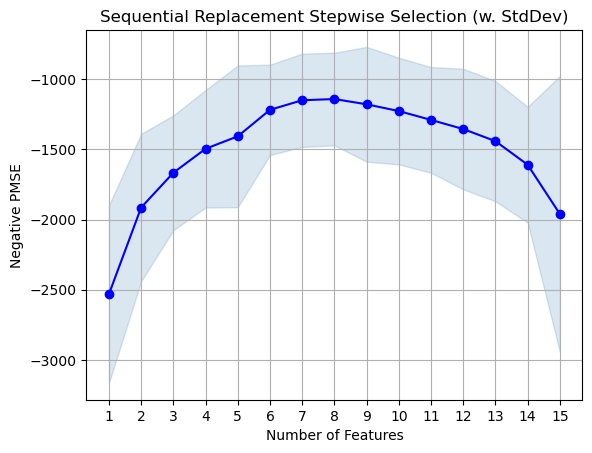

In [16]:
# Code to plot the (negative) PMSEs
fig1 = plot_sfs(seqrep.get_metric_dict(), kind = 'std_dev')
plt.title('Sequential Replacement Stepwise Selection (w. StdDev)')
plt.ylabel("Negative PMSE")
plt.grid()
plt.show()

In [17]:
# Code to see the next best models
seqrep_results = pd.DataFrame.from_dict(seqrep.get_metric_dict()).T
seqrep_results_sorted = seqrep_results.sort_values(by = 'avg_score', ascending = False)
seqrep_results_sorted.head(10)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
8,"(0, 1, 2, 4, 5, 8, 11, 12)","[-1403.8174669864263, -632.6340545413613, -157...",-1141.855767,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PopPerH...",424.029918,329.909682,164.954841
7,"(0, 1, 4, 5, 8, 11, 12)","[-1352.8946312793485, -640.7656916504335, -163...",-1150.399212,"(AnnPrecip, MeanJanTemp, PopPerHouse, School, ...",426.999603,332.220198,166.110099
9,"(0, 1, 2, 3, 4, 5, 8, 11, 12)","[-1216.2860114626085, -523.9285575629165, -138...",-1179.289453,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PctGT65...",525.344253,408.735677,204.367838
6,"(0, 1, 4, 5, 8, 12)","[-1476.2143878325269, -756.4170707755611, -166...",-1218.582064,"(AnnPrecip, MeanJanTemp, PopPerHouse, School, ...",413.29193,321.555163,160.777581
10,"(0, 1, 2, 3, 4, 5, 8, 11, 12, 14)","[-1233.0389195215146, -672.1780364586507, -140...",-1227.476287,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PctGT65...",488.56756,380.12216,190.06108
11,"(0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 13)","[-1341.716728926903, -596.1731973886316, -1483...",-1290.476348,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PctGT65...",483.852015,376.453306,188.226653
12,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13)","[-1367.7138855929977, -597.7904831299273, -162...",-1355.624295,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PctGT65...",552.004523,429.478272,214.739136
5,"(1, 4, 5, 8, 12)","[-1679.8858850370498, -430.1733946015856, -186...",-1407.39516,"(MeanJanTemp, PopPerHouse, School, PctNonWhite...",648.806102,504.793189,252.396595
13,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14)","[-1448.1821447235736, -702.0666862889606, -169...",-1441.721998,"(AnnPrecip, MeanJanTemp, MeanJulyTemp, PctGT65...",550.782715,428.527664,214.263832
4,"(1, 4, 5, 8)","[-1908.8997124359403, -714.813484163367, -1479...",-1496.215147,"(MeanJanTemp, PopPerHouse, School, PctNonWhite)",537.897159,418.502264,209.251132


In [18]:
# Code to pull out variable names of 5-variable model
seqrep_results.sort_index().iloc[4, 3]

('MeanJanTemp', 'PopPerHouse', 'School', 'PctNonWhite', 'log.Nit')

### We will now apply shrinkage methods as variable selection techniques. Start by applying LASSO using `sklearn` to this data set using the PMSE metric (`neg_mean_squared_error`) with cv = 5. Do the following: (a) Output the lambda (called alpha in the code) coefficient value corresponding to the 1 standard error rule, and (b) output the variable coefficient values resulting from LASSO with lambda equal to the value obtained in (a).

In [19]:
# Standardize predictors
y = env['AAMort'].ravel()
variable_names = X.columns
scaler = StandardScaler().fit(X[variable_names]) 
X[variable_names] = scaler.transform(X[variable_names])

In [20]:
# Create a list of possible alphas
potential_alphas = np.logspace(-4, 2, 500)
LASSOCV_model = LassoCV(alphas = potential_alphas, 
                        cv = 5, 
                        random_state = 12345, 
                        max_iter = 10000, 
                        fit_intercept = True)

# Fit the model
LASSOCV_model.fit(X, y)

# Get the list of alphas and corresponding MSEs
alphas = LASSOCV_model.alphas_
pmse_means = np.mean(LASSOCV_model.mse_path_, axis = 1)
pmse_std_error = np.std(LASSOCV_model.mse_path_, 
                        axis = 1,
                        ddof = 1) / np.sqrt(5)  # 5-fold CV

# Find the alpha that minimizes MSE
alpha_index_min = np.argmin(pmse_means)
alpha_min = alphas[alpha_index_min]

# Find the MSE that is one standard error away from the minimum MSE
one_se_above_min = min(pmse_means) + pmse_std_error[alpha_index_min]

# Find the largetst alpha with MSE less than or equal to one_se_above_min
alpha_index_1se = np.where(pmse_means <= one_se_above_min)[0][0]
alpha_1se = alphas[alpha_index_1se]

print("Minimum alpha:", alpha_min)
print("One SE alpha:", alpha_1se)

Minimum alpha: 2.587174078595924
One SE alpha: 9.505082962189512


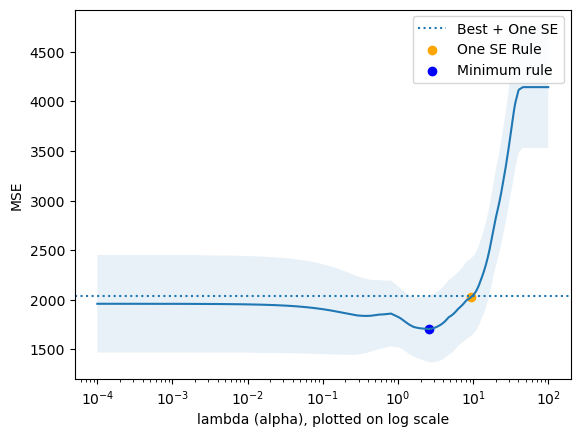

In [21]:
# Optional plot
plt.plot(alphas, 
         pmse_means)
plt.fill_between(alphas, 
                 pmse_means + pmse_std_error, 
                 pmse_means - pmse_std_error, 
                 alpha = 0.1)
plt.axhline(one_se_above_min, 
            linestyle = 'dotted', 
            label = 'Best + One SE')
plt.scatter([alpha_1se], 
            [pmse_means[alpha_index_1se]], 
            marker = 'o',
            color = 'orange', 
            label = 'One SE Rule')
plt.scatter([alpha_min],
            [pmse_means[alpha_index_min]],
            marker = 'o',
            color = 'blue',
            label = 'Minimum rule')
plt.legend()
plt.xscale('log')
plt.xlabel('lambda (alpha), plotted on log scale')
plt.ylabel('MSE')
plt.show()

In [22]:
# LASSO results with lambda within one SE of the mean
LASSO_1se = Lasso(alpha = alpha_1se,
                   fit_intercept = True)
LASSO_1se.fit(X, y)

# Get coefficients
print(list(zip(LASSO_1se.coef_, X)))

[(9.0582213136526, 'AnnPrecip'), (-0.0, 'MeanJanTemp'), (0.0, 'MeanJulyTemp'), (-0.0, 'PctGT65'), (0.0, 'PopPerHouse'), (-9.311065730381976, 'School'), (-0.0, 'PctSound'), (0.0, 'PopPerSqMile'), (23.846152101387357, 'PctNonWhite'), (-0.0, 'PctWhiteCollar'), (0.0, 'PctU20000'), (0.0, 'log.Hydro'), (0.0, 'log.Nit'), (12.819690895022104, 'log.SO2'), (0.0, 'RelHumid')]


In [23]:
# LASSO results with min(lambda)
LASSO_min = Lasso(alpha = alpha_min,
                   fit_intercept = True)
LASSO_min.fit(X, y)

# Get coefficients
print(list(zip(LASSO_min.coef_, X)))

[(18.108093726913285, 'AnnPrecip'), (-14.772210017652814, 'MeanJanTemp'), (-0.0, 'MeanJulyTemp'), (-0.0, 'PctGT65'), (-0.0, 'PopPerHouse'), (-10.462567357587796, 'School'), (-0.6618046244034725, 'PctSound'), (3.6684052113745063, 'PopPerSqMile'), (30.79914878084185, 'PctNonWhite'), (-0.0, 'PctWhiteCollar'), (0.0, 'PctU20000'), (0.0, 'log.Hydro'), (15.892172777363877, 'log.Nit'), (1.8263475540746517, 'log.SO2'), (0.0, 'RelHumid')]


### Now apply the Elastic Net method using `sklearn` to this data set using the PMSE metric (`neg_mean_squared_error`) with cv = 5. Do the following: (a) Output the lambda (called alpha in the code) coefficient value corresponding to the 1 standard error rule, and (b) output the variable coefficient values resulting from LASSO with lambda equal to the value obtained in (a).

In [24]:
# Create a list of possible alphas
potential_alphas = np.logspace(-4, 2, 500)

# run cross-validation to find the best alpha and l1_ratio
ElasticNetCV_model = ElasticNetCV(alphas = potential_alphas, 
                                  cv = 5, 
                                  random_state = 12345, 
                                  max_iter = 10000, 
                                  fit_intercept = True)
ElasticNetCV_model.fit(X, y)

# Get the list of alphas and corresponding MSEs
alphas = ElasticNetCV_model.alphas_
pmse_means = np.mean(ElasticNetCV_model.mse_path_, axis = 1)
pmse_std_error = np.std(ElasticNetCV_model.mse_path_, 
                        axis = 1,
                        ddof = 1) / np.sqrt(5)  # 5-fold CV

# Find the alpha that minimizes MSE
alpha_index_min = np.argmin(pmse_means)
alpha_min = alphas[alpha_index_min]

# Find the MSE that is one standard error away from the minimum MSE
one_se_above_min = min(pmse_means) + pmse_std_error[alpha_index_min]

# Find the largetst alpha with MSE less than or equal to one_se_above_min
alpha_index_1se = np.where(pmse_means <= one_se_above_min)[0][0]
alpha_1se = alphas[alpha_index_1se]

print("Minimum alpha:", alpha_min)
print("One SE alpha:", alpha_1se)

Minimum alpha: 0.5642908471262537
One SE alpha: 2.8901597179095115


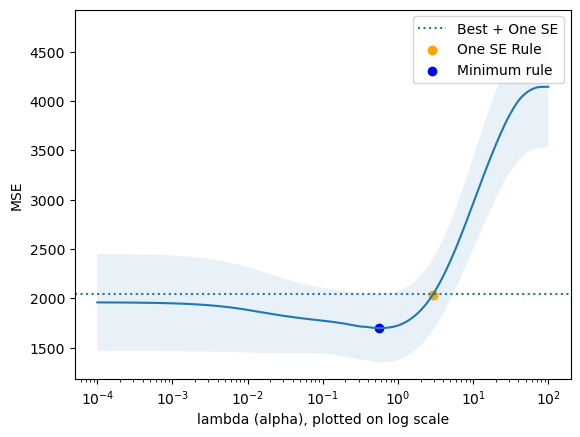

In [25]:
# Optional plot
plt.plot(alphas, 
         pmse_means)
plt.fill_between(alphas, 
                 pmse_means + pmse_std_error, 
                 pmse_means - pmse_std_error, 
                 alpha = 0.1)
plt.axhline(one_se_above_min, 
            linestyle = 'dotted', 
            label = 'Best + One SE')
plt.scatter([alpha_1se], 
            [pmse_means[alpha_index_1se]], 
            marker = 'o',
            color = 'orange', 
            label = 'One SE Rule')
plt.scatter([alpha_min],
            [pmse_means[alpha_index_min]],
            marker = 'o',
            color = 'blue',
            label = 'Minimum rule')
plt.legend()
plt.xscale('log')
plt.xlabel('lambda (alpha), plotted on log scale')
plt.ylabel('MSE')
plt.show()

In [26]:
# Elastic Net results with lambda within one SE of the mean
en_1se = ElasticNet(alpha = alpha_1se,
                     fit_intercept = True)
en_1se.fit(X, y)

# Get coefficients
print(list(zip(en_1se.coef_, X)))

[(8.311445024109691, 'AnnPrecip'), (-2.167915359127648, 'MeanJanTemp'), (2.0028451587915606, 'MeanJulyTemp'), (-1.2933778619826046, 'PctGT65'), (3.292967342778567, 'PopPerHouse'), (-5.828246377871679, 'School'), (-4.4592534740234955, 'PctSound'), (4.098080134747552, 'PopPerSqMile'), (10.449643157154414, 'PctNonWhite'), (-2.2784206826673974, 'PctWhiteCollar'), (3.2437139982554943, 'PctU20000'), (1.9165301146122002, 'log.Hydro'), (5.07175695739723, 'log.Nit'), (6.698095279573093, 'log.SO2'), (0.0, 'RelHumid')]


In [27]:
# Elastic Net results with min(lambda)
en_min = ElasticNet(alpha = alpha_min,
                     fit_intercept = True)
en_min.fit(X, y)

# Get coefficients
print(list(zip(en_min.coef_, X)))

[(16.074287089221972, 'AnnPrecip'), (-9.167955350752168, 'MeanJanTemp'), (1.3199214675625055, 'MeanJulyTemp'), (-3.31162091330138, 'PctGT65'), (0.7064569986141505, 'PopPerHouse'), (-7.300372027105419, 'School'), (-5.342254185683616, 'PctSound'), (5.929419162498343, 'PopPerSqMile'), (20.48820501972833, 'PctNonWhite'), (-2.471187161270022, 'PctWhiteCollar'), (1.9557154539999726, 'PctU20000'), (0.9234557076296959, 'log.Hydro'), (10.700187814051224, 'log.Nit'), (8.505203643395289, 'log.SO2'), (1.443871606468231, 'RelHumid')]


## Now that you have seen the various results from the different methods, pick a subset of variables that you will include in the model. Create the multiple linear regression model with these variables.

In [28]:
y = env[['AAMort']]
X_subset = sm.add_constant(env[['AnnPrecip', 'MeanJanTemp', 'School', 'PctNonWhite', 'log.Nit']])
mod = sm.OLS(y, X_subset)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AAMort   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     31.43
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           7.58e-15
Time:                        12:15:02   Log-Likelihood:                -291.55
No. Observations:                  60   AIC:                             595.1
Df Residuals:                      54   BIC:                             607.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1002.2638     87.705     11.428      0.000     826.427    1178.101
AnnPrecip       2.2616      0.624      3.626      0.001       1.011       3.512
MeanJanTemp    -2.0340      0.487     -4.174      0.000      -3.011      -1.057
School        -13.9333      6.097     -2.285      0.026     -26.157      -1.710
PctNonWhite     3.7287      0.638      5.844      0.000       2.450       5.008
log.Nit        19.4866      4.356      4.474      0.000      10.754      28.219
==============================================================================
Omnibus:                        1.309   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.520   Jarque-Bera (JB):                0.631
Skew:                          -0.133   Prob(JB):                        0.730
Kurtosis:                       3.426   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Once you have chosen a model, you should check the model assumptions. For now, skip checking assumptions 1-6 (you can always go back and do this later) and use variance inflation factors to test for multicollinearity. Do you think multicollinearity is a problem for this model?

In [29]:
# Variance Inflation Factors (VIF)
env_vifs = pd.DataFrame()
env_vifs['Feature'] = X_subset.columns[1:]
env_vifs['VIF'] = [vif(X_subset, i) for i in range(1, len(X_subset.columns))]

print("Max = ", max(env_vifs['VIF']))
print("Mean = ", np.mean(env_vifs['VIF']))
env_vifs

Max =  2.115517478784311
Mean =  1.6248128360345355


,Feature,VIF
0,AnnPrecip,2.115517
1,MeanJanTemp,1.339834
2,School,1.449150
3,PctNonWhite,1.767443
4,log.Nit,1.452120


## Summary and Conclusions

Multicollinearity is a common problem for linear models, and it is important that it is addressed to avoid the many pitfalls that arise (such as inflated standard errors). We performed several variable selection procedures to try to eliminate multicollinearity, which would also help us avoid overfitting. Ultimately, there is no “right” answer as to which variables should be included. There are many acceptable models, and there are certainly many bad models, but there is no one correct model. In general, it is good to run several procedures and look for similarities in the variables included.